In [1]:
import numpy as np
import random
from keras import layers,regularizers
from keras.layers import Input,ZeroPadding2D,Conv2D,Activation,BatchNormalization,Flatten,Dense,Dropout,MaxPooling2D
from keras.models import Model,Sequential
from keras.preprocessing import image
from keras.utils import layer_utils,plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
def load_dataset():
    train_X = []
    train_Y = []
    test_X = []
    test_Y = []
    
    for i in range(1,2001): 
        train_path = "dataset/training_set/cats/cat.{}.jpg".format(i)
        img = image.load_img(train_path, target_size=(64, 64))
        x = image.img_to_array(img)/255.
        x = np.expand_dims(x, axis=0)
        train_X.append(x)
        train_Y.append(0)
    for i in range(1,2001): 
        train_path = "dataset/training_set/dogs/dog.{}.jpg".format(i)
        img = image.load_img(train_path, target_size=(64, 64))
        x = image.img_to_array(img)/255.
        x = np.expand_dims(x, axis=0)
        train_X.append(x)
        train_Y.append(1)
    for i in range(4001,5001): 
        train_path = "dataset/test_set/cats/cat.{}.jpg".format(i)
        img = image.load_img(train_path, target_size=(64, 64))
        x = image.img_to_array(img)/255.
        x = np.expand_dims(x, axis=0)
        test_X.append(x)
        test_Y.append(0)
    for i in range(4001,5001): 
        train_path = "dataset/test_set/dogs/dog.{}.jpg".format(i)
        img = image.load_img(train_path, target_size=(64, 64))
        x = image.img_to_array(img)/255.
        x = np.expand_dims(x, axis=0)
        test_X.append(x)
        test_Y.append(1)
   
    np.random.seed(0)
    permutation = list(np.random.permutation(8000))
    train_x = np.squeeze(np.array(train_X))
    test_x = np.squeeze(np.array(test_X))
    train_y = np.squeeze(np.array(train_Y))
    test_y = np.squeeze(np.array(test_Y))
    print("Training images shape::::",train_x.shape)
    print("Training labels shape::::",train_y.shape)
    print("Test images shape::::",test_x.shape)
    print("Test labels shape::::",test_y.shape)    
    plt.imshow(train_x[273])
    print(train_y[273])
    return train_x,train_y,test_x,test_y

In [57]:
l2 = regularizers.l2(0.00020)
model = Sequential()
model.add(Conv2D(32,(3,3),strides = (1,1),input_shape = (64,64,3),name = "Conv_1",kernel_regularizer=l2, kernel_initializer='he_uniform'))
model.add(BatchNormalization(axis = 3,name = "bn_1"))
model.add(Activation("relu"))
model.add(Conv2D(32,(3,3),strides = (1,1),name = "Conv_2",kernel_regularizer=l2, kernel_initializer='he_uniform'))
model.add(BatchNormalization(axis = 3,name = "bn_2"))
model.add(Activation("relu"))
model.add(MaxPooling2D(strides = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),strides = (1,1),name = "Conv_3",kernel_regularizer=l2, kernel_initializer='he_uniform'))
model.add(BatchNormalization(axis = 3,name = "bn_3"))
model.add(Activation("relu"))
model.add(Conv2D(64,(3,3),strides = (1,1),name = "Conv_4",kernel_regularizer=l2, kernel_initializer='he_uniform'))
model.add(BatchNormalization(axis = 3,name = "bn_4"))
model.add(Activation("relu"))
model.add(MaxPooling2D(strides = (2,2)))
model.add(Dropout(0.2)) 

model.add(Conv2D(128,(3,3),strides = (1,1),name = "Conv_5",kernel_regularizer=l2, kernel_initializer='he_uniform'))
model.add(BatchNormalization(axis = 3,name = "bn_5"))
model.add(Activation("relu"))
model.add(MaxPooling2D(strides = (2,2)))
model.add(Dropout(0.2))
          
model.add(Flatten())
model.add(Dense(128,activation = "relu", name = "Dense_1", kernel_regularizer=l2,kernel_initializer='he_uniform'))
model.add(Dropout(0.5))

#model.add(Dense(64,activation = "relu", name = "Dense_2", kernel_initializer='he_uniform'))
model.add(Dense(1,activation = "sigmoid", name = "Dense_2"))
    

Training images shape:::: (4000, 64, 64, 3)
Training labels shape:::: (4000,)
Test images shape:::: (2000, 64, 64, 3)
Test labels shape:::: (2000,)
0


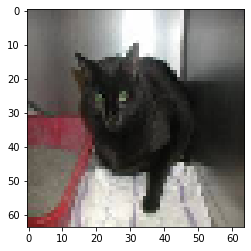

In [58]:
train_X,train_Y,test_X,test_Y = load_dataset()

Training images shape:::: (4000, 64, 64, 3)
Training labels shape:::: (4000,)
Test images shape:::: (2000, 64, 64, 3)
Test labels shape:::: (2000,)
0


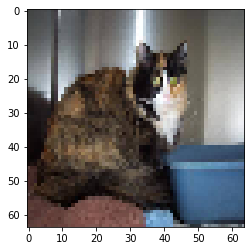

In [59]:
p = np.random.permutation(4000)
train_x = train_X[p]
train_y = train_Y[p]
p = np.random.permutation(2000)
test_x = test_X[p]
test_y = test_Y[p]
print("Training images shape::::",train_x.shape)
print("Training labels shape::::",train_y.shape)
print("Test images shape::::",test_x.shape)
print("Test labels shape::::",test_y.shape)
print(train_y[129])
plt.imshow(train_x[129])

0
Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


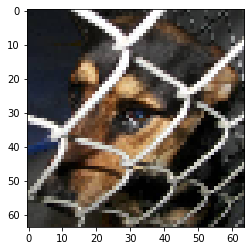

In [35]:
train_datagen = ImageDataGenerator()

test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
    'dataset/training_set',
    target_size=(64, 64),
    batch_size=16,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    'dataset/test_set',
    target_size=(64, 64),
    batch_size=16,
    class_mode='binary')


In [60]:
model.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [61]:
history = model.fit(train_x,train_y,batch_size = 32,validation_data=(test_x,test_y),epochs=25)

Train on 4000 samples, validate on 2000 samples
Epoch 1/25
4000/4000 [==============================] - 76s 19ms/step - loss: 0.9700 - accuracy: 0.5210 - val_loss: 0.8788 - val_accuracy: 0.4990
Epoch 2/25
4000/4000 [==============================] - 74s 19ms/step - loss: 0.8419 - accuracy: 0.5935 - val_loss: 0.8874 - val_accuracy: 0.5105
Epoch 3/25
4000/4000 [==============================] - 76s 19ms/step - loss: 0.8191 - accuracy: 0.6068 - val_loss: 0.8274 - val_accuracy: 0.5985
Epoch 4/25
4000/4000 [==============================] - 73s 18ms/step - loss: 0.8102 - accuracy: 0.6137 - val_loss: 0.8073 - val_accuracy: 0.6105
Epoch 5/25
4000/4000 [==============================] - 74s 18ms/step - loss: 0.7991 - accuracy: 0.6215 - val_loss: 0.7732 - val_accuracy: 0.6395
Epoch 6/25
4000/4000 [==============================] - 78s 19ms/step - loss: 0.7709 - accuracy: 0.6330 - val_loss: 0.8054 - val_accuracy: 0.6085
Epoch 7/25
4000/4000 [==============================] - 74s 18ms/step - loss

2000/2000 [==============================] - 11s 6ms/step
[0.5589149024486542, 0.8130000233650208]


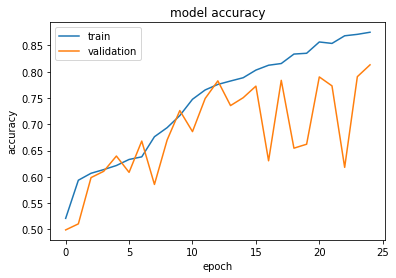

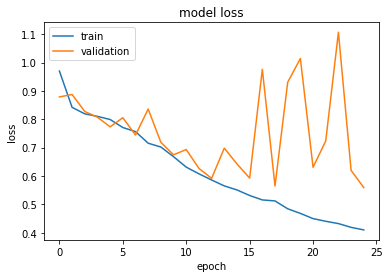

In [64]:
preds = model.evaluate(test_x,test_y)
print(preds)
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

(1, 64, 64, 3)
[[1.]]


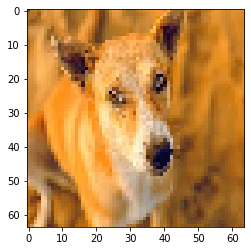

In [54]:
import cv2
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
img = cv2.imread("images/download.jpg")
### START CODE HERE ###
img_path = 'images/download17.jpg'
### END CODE HERE ###
img = image.load_img(img_path, target_size=(64, 64))
plt.imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print(x.shape)

print(np.floor(model.predict(x)))